In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from src.cdf import *
from src.poly_fit import *
import matplotlib.pyplot as plt
from src.bsm import *
from scipy.optimize import leastsq
from scipy.interpolate import CubicSpline
from scipy.interpolate import splrep, BSpline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Test for normally distributed data

In [9]:
np.random.seed(10)
x=np.random.normal(0,1,800)
x=np.sort(x)
y=cdf_funct(x)

fit=polyfit(y,beta_rat_polyfit(y, x, order=3))

_,y_sub,fit_spl_rpol=spl_polyfit(x,y)
# popt, pcov = curve_fit(rational_2, y,x)
popt, _ = curve_fit(rational_3, y,x, maxfev=1000)

fit_gauss_newton=polyfit(y,GaussNewton(y,x,order=4))

In [10]:
def rational(x, p, q):
    return np.polyval(p, x) / ([1.0]+np.polyval(q, x))

def rational_2(x, p0, p1, p2, q1, q2):
    return rational(x, [p0, p1, p2], [q1, q2])


def rational_3(x, p0, p1, p2,p3, q1, q2,q3):
    return rational(x, [p0, p1, p2, p3], [q1, q2,q3])

In [11]:
rational_3(y, *popt)

array([-2.80142181e+00, -2.71636954e+00, -2.63851637e+00, -2.56695817e+00,
       -2.50093610e+00, -2.43980857e+00, -2.38302945e+00, -2.33013096e+00,
       -2.28071005e+00, -2.23441765e+00, -2.19094987e+00, -2.15004096e+00,
       -2.11145748e+00, -2.07499355e+00, -2.04046689e+00, -2.00771554e+00,
       -1.97659510e+00, -1.94697643e+00, -1.91874365e+00, -1.89179251e+00,
       -1.86602896e+00, -1.84136793e+00, -1.81773230e+00, -1.79505195e+00,
       -1.77326302e+00, -1.75230723e+00, -1.73213125e+00, -1.71268623e+00,
       -1.69392729e+00, -1.67581316e+00, -1.65830582e+00, -1.64137018e+00,
       -1.62497379e+00, -1.60908663e+00, -1.59368084e+00, -1.57873058e+00,
       -1.56421182e+00, -1.55010218e+00, -1.53638081e+00, -1.52302825e+00,
       -1.51002632e+00, -1.49735801e+00, -1.48500740e+00, -1.47295955e+00,
       -1.46120047e+00, -1.44971698e+00, -1.43849673e+00, -1.42752808e+00,
       -1.41680004e+00, -1.40630230e+00, -1.39602508e+00, -1.38595919e+00,
       -1.37609590e+00, -

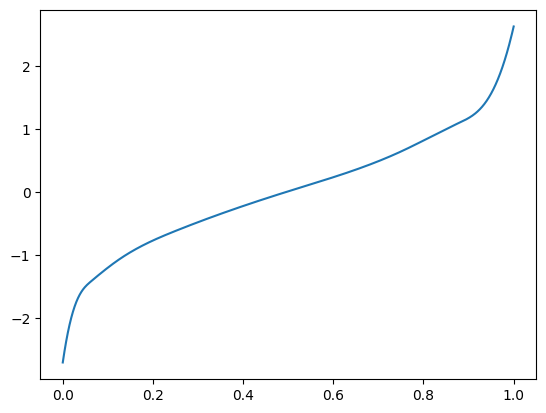

In [25]:
tck = splrep(y, x, s=1)
plt.plot(y, BSpline(*tck)(y))
# plt.plot(y,x)

In [17]:
popt, _ = curve_fit(rational_3, y,x)
curve_fit(rational_3, y,x)

(array([-96.14287187, 145.55398031, -41.67261529,  -3.50162815,
        -46.31892755,  46.6027916 ,   0.24994677]),
 array([[ 6.87323664e+11, -1.04056268e+12,  2.97916546e+11,
          2.50331511e+10,  3.31133608e+11, -3.33162951e+11,
         -8.93585783e+09],
        [-1.04056268e+12,  1.57534323e+12, -4.51025993e+11,
         -3.78985390e+10, -5.01314432e+11,  5.04386724e+11,
          1.35282991e+10],
        [ 2.97916546e+11, -4.51025993e+11,  1.29130238e+11,
          1.08504774e+10,  1.43527985e+11, -1.44407592e+11,
         -3.87319692e+09],
        [ 2.50331511e+10, -3.78985390e+10,  1.08504774e+10,
          9.11737347e+08,  1.20602826e+10, -1.21341937e+10,
         -3.25454645e+08],
        [ 3.31133608e+11, -5.01314432e+11,  1.43527985e+11,
          1.20602826e+10,  1.59531050e+11, -1.60508732e+11,
         -4.30505014e+09],
        [-3.33162951e+11,  5.04386724e+11, -1.44407592e+11,
         -1.21341937e+10, -1.60508732e+11,  1.61492405e+11,
          4.33143352e+09],
  

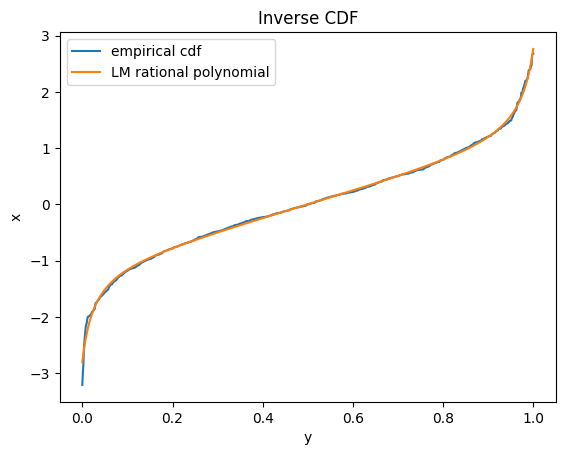

In [18]:
plt.plot(y, np.sort(x), label="empirical cdf")
# plt.plot(y, fit, label="poly fit")
# plt.plot(y_sub, fit_spl_rpol, label="spline rat polynomial")
# plt.plot(y, inverse_normal_cdf(y), label="bsm algorithm")
plt.plot(y, rational_3(y, *popt), label='LM rational polynomial')

# plt.plot(y, fit_gauss_newton, label="gauss netweon")

plt.xlabel("y")
plt.ylabel("x")
plt.title("Inverse CDF")
plt.legend()


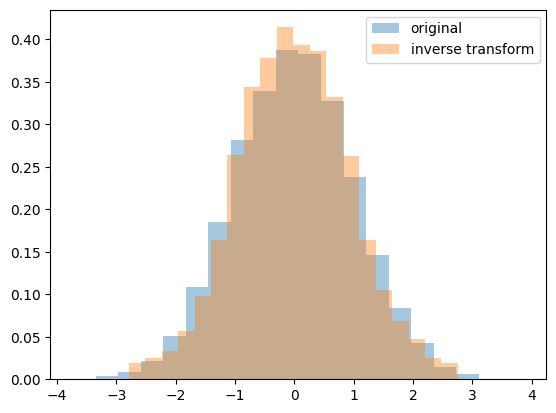

In [11]:
plt.hist(np.random.normal(0,1,10000), bins=20, label="original", density=True, alpha=0.4);

plt.hist(rational_3(np.random.uniform(0,1,10000), *popt), bins=20, label="inverse transform", density=True, alpha=0.4);

plt.legend()

In [7]:
# # checking correctness with example at https://www.originlab.com/doc/Tutorials/RationalFunc-InitialParameter
# daat=[-1.5,	1.13173,
# -1.39474,	0.8262,
# -1.28947,	1.06999,
# -1.18421,	1.37155,
# -1.07895,	0.79569,
# -0.97368,	2.11346,
# -0.86842,	2.32006,
# -0.76316,	3.9205,
# -0.65789,	5.81904,
# -0.55263,	7.38037,
# -0.44737,	8.31272,
# -0.34211,	11.39718,
# -0.23684,	8.39808,
# -0.13158,	4.7305,
# -0.02632,	4.11105,
# 0.07895,	2.39105,
# 0.18421,	1.65394,
# 0.28947,	0.42953,
# 0.39474,	0.83337,
# 0.5,	1.18758]
# x=np.array(daat[::2])
# y=np.array(daat[1::2])
# plt.plot(x,y, "o")
# plt.plot(x,polyfit(x,beta_rat_polyfit(x, y, order=2)))